# Predict with new data

### Import all Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread
import tensorflow as tf
from keras.preprocessing import image

### Load the model

In [2]:
img_height=180
img_width=180

model = tf.keras.models.load_model('Mango_Fruit_Detection_Model.h5')

### Declare class names

In [3]:
class_names = ['Alternaria', 'Anthracnose', 'Black_Mould_Rot', 'Healthy', 'Stem_and_Rot']
class_name = {1: 'Alternaria', 2: 'Anthracnose', 3: 'Black_Mould_Rot', 4: 'Healthy', 5: 'Stem_and_Rot'}

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("mango_dataset/Mango_fruit_dataset.csv")
df = df.replace('',np.nan)
df = df.dropna(axis="columns",how="any")
df

,Sn no,Disease Type,Severity,Location/Date,Description,Symptoms,Diagnosis,Precautions
0,1,Alternaria,"Mild, Moderate, Severe","[Location], [Date]",A fungal disease that causes dark brown or bla...,Spots on leaves are circular to irregular in s...,Microscopic examination of the fungal spores i...,Plant resistant varieties of mangoes. Avoid ov...
1,2,Anthracnose,"Mild, Moderate, Severe","[Location], [Date]",A fungal disease that causes dark brown to bla...,Spots on leaves are circular to irregular in s...,Microscopic examination of the fungal spores i...,Plant resistant varieties of mangoes. Avoid ov...
2,3,Black mold root,"Mild, Moderate, Severe","[Location], [Date]",A fungal disease that causes black mold to gro...,"Symptoms include wilting, yellowing, and defol...",Microscopic examination of the fungal spores i...,Apply fungicides to the soil around the tree. ...
3,4,Healthy,Healthy,"[Location], [Date]",No signs of disease.,"Leaves are green and healthy, fruit is free of...",No diagnosis necessary.,Continue to monitor the tree for signs of dise...
4,5,Steam and root,"Mild, Moderate, Severe","[Location], [Date]",A fungal disease that causes the roots of mang...,"Symptoms include wilting, yellowing, and defol...",Microscopic examination of the fungal spores i...,Apply fungicides to the soil around the tree. ...


### Giving image as input

In [5]:
path = "mango_dataset/28137711-rot-mango-fruit-on-white-background.jpg"

### image preprocessing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
Predicted class : 0
Predict Disease : Alternaria


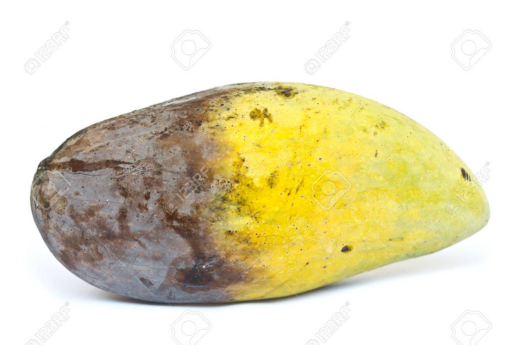



Disease Type : Alternaria
Severity : Mild, Moderate, Severe
Description : A fungal disease that causes dark brown or black spots on leaves, fruit, and stems.
Symptoms : Spots on leaves are circular to irregular in shape and have a yellow halo. Spots on fruit are round and sunken, and may have a greenish-white mold growing on them.
Diagnosis : Microscopic examination of the fungal spores is necessary for diagnosis.
Precautions : Plant resistant varieties of mangoes. Avoid overhead irrigation. Spray fungicides at regular intervals.


In [6]:
img = image.load_img(path,target_size=(img_height,img_width))
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)
# img = preprocess_input(img)



prediction = model.predict(img)

predicted_class = np.argmax(prediction)

print(f"Predicted class : {predicted_class}")
print(f"Predict Disease : {class_names[predicted_class]}")
df
Sn_no, Disease_Type, Severity, Location_Date ,Description ,Symptoms  ,Diagnosis ,Precautions = df.loc[predicted_class,:]
img = imread(path)
plt.imshow(img)
plt.axis('off')
plt.show()

print(f"\n\nDisease Type : {Disease_Type}\nSeverity : {Severity}\nDescription : {Description}\nSymptoms : {Symptoms}\nDiagnosis : {Diagnosis}\nPrecautions : {Precautions}")